In [1]:
import time
import os

import numpy as np
from pysat.formula import CNF 
from pysat.solvers import Solver
from pylll import lll_decision


def read_sat(sat_path):
    with open(sat_path) as f:
        sat_lines = f.readlines()
        header = sat_lines[0]
        header_info = header.replace("\n", "").split(" ")
        num_vars = int(header_info[-2])
        num_clauses = int(header_info[-1])

        sat = [[int(x) for x in line.replace(' 0\n', '').split(' ')]
               for line in sat_lines[1:]]

        return sat, num_vars, num_clauses


In [2]:
unsat_path = './unsat_formulas/'

unsat_instances = []
for name in os.listdir(unsat_path):
    sat_path = unsat_path + name
    sat_instance, num_vars, num_clauses = read_sat(sat_path)
    unsat_instances.append(sat_instance)

plot_data = []
num_all = len(unsat_instances)
for i in range(1, 100):
    num_lll = 0
    part_instances = [instance[:i] for instance in unsat_instances]
    for instance in part_instances:
        if lll_decision(instance, 100, eval_iter=20):
            num_lll += 1
    # print(f'sat_size: {i}, number of all: {num_all}, number of lll: {num_lll}, percent: {num_lll/num_all}')
    plot_data.append((i/100, num_lll/num_all))
    

In [5]:
instances_sizes = []

for name in os.listdir(unsat_path):
    sat_path = unsat_path + name
    sat_instance, num_vars, num_clauses = read_sat(sat_path)
    unsat_instances.append(sat_instance)
    instances_sizes.append(num_clauses)

print(len(instances_sizes))
max_size = max(instances_sizes)
print(max_size)

instance_distribution = [[], []]
for i in range(1, max_size+1):
    instance_distribution[0].append(i/100)
    instance_distribution[1].append(1 - len([x for x in instances_sizes if x < i])/len(instances_sizes))

497
1527


/var/folders/qz/6jw6ywgd3bvdbjspv5vl39nm0000gn/T/ipykernel_58350/11282717.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


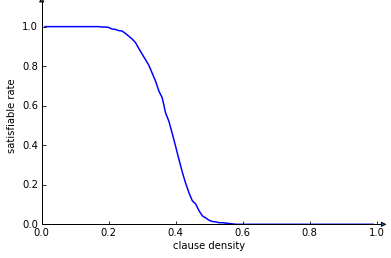

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import AxesZero


fig = plt.figure()

ax = fig.add_subplot(axes_class=AxesZero)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1.1)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

ax.plot(*zip(*plot_data), color='blue')

# ax.plot(instance_distribution[0], instance_distribution[1], color='red')

ax.set_xlabel("clause density")
ax.set_ylabel("satisfiable rate")

fig.show()
fig.savefig('lll-pt.png')

/var/folders/qz/6jw6ywgd3bvdbjspv5vl39nm0000gn/T/ipykernel_58350/2429829106.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


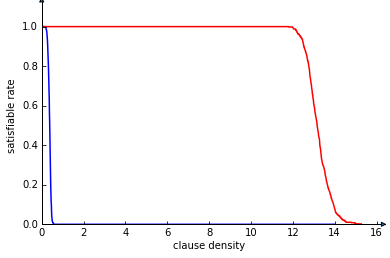

In [7]:
import matplotlib.pyplot as plt

lll_data = [x for x in plot_data]
lll_data.append((14, 0))

fig = plt.figure()
ax = fig.add_subplot(axes_class=AxesZero)

ax.set_xlim(0, 16)
ax.set_ylim(0, 1.1)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")
    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)
for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)


ax.plot(*zip(*lll_data), color='blue')
ax.plot(instance_distribution[0], instance_distribution[1], color='red')

ax.set_xlabel("clause density")
ax.set_ylabel("satisfiable rate")

fig.show()
fig.savefig('lll-satisfiable-pt.png')